In [1]:
# now i want the user to give input and the model should predict it

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/phone_data_proje.csv")
df

,phone_name,brand,os,battery(MH),ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Huawei,Android 5.1,2200,2,16.0,120.000
1,K20 plus,LG,Android 7.0,2700,2,16.0,100.000
2,P8 Lite (2017),Huawei,Android 7.0,3000,4,16.0,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,4100,4,32.0,150.000
4,P10,Huawei,Android 7.0,3200,4,32.0,420.000
...,...,...,...,...,...,...,...
1506,vivo Y77t,Vivo,Android 13,5000,8,256.0,170.000
1507,11x,Realme,Android 13,5000,8,128.0,182.880
1508,GT5,Realme,Android 13,5240,16,256.0,380.000
1509,GT5 240W,Realme,Android 13,4600,24,1.0,470.000


In [15]:
# Fill missing storage with median
df["storage(GB)"].fillna(df["storage(GB)"].median(), inplace=True)


In [16]:
q1=df['battery(MH)'].quantile(0.25)
q3=df['battery(MH)'].quantile(0.75)
iqr=q3-q1

In [17]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

In [18]:
bat_arr=df['battery(MH)']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
print(out)

0       2500
5       2500
19      2500
27      2500
28      2500
45      2500
61      2500
68      2500
89      2500
98      2500
115     2500
132     2500
186     2500
244     2500
535     2500
700     2500
947     2500
1094    2500
Name: battery(MH), dtype: int64


In [19]:
batt_arr=df['battery(MH)']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

In [20]:
for i in df['battery(MH)']:
    if i <lower_bound:
        df['battery(MH)']=df['battery(MH)'].replace(i,lower_cap)
    elif i >upper_bound:
        df['battery(MH)']=df['battery(MH)'].replace(i,upper_cap)

<Axes: >

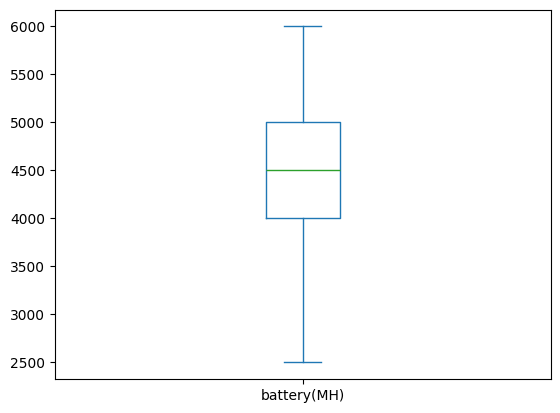

In [21]:
df['battery(MH)'].plot(kind='box')

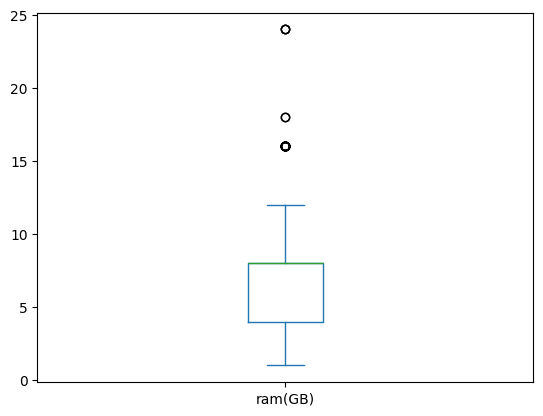

In [22]:
df['ram(GB)'].plot(kind='box')
plt.show()

In [23]:
q1=df['ram(GB)'].quantile(0.25)
q3=df['ram(GB)'].quantile(0.75)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr) 

bat_arr=df['ram(GB)']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    

batt_arr=df['ram(GB)']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99) 

for i in df['ram(GB)']:
    if i <lower_bound:
        df['ram(GB)']=df['ram(GB)'].replace(i,lower_cap)
    elif i >upper_bound:
        df['ram(GB)']=df['ram(GB)'].replace(i,upper_cap)

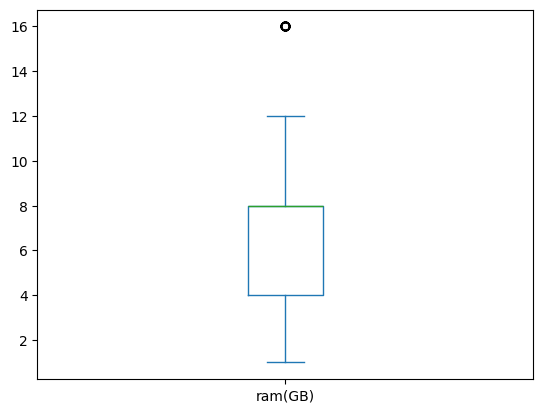

In [24]:
df['ram(GB)'].plot(kind='box')
plt.show()

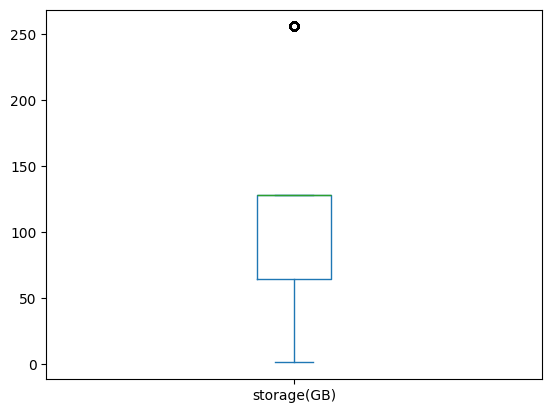

In [25]:
df['storage(GB)'].plot(kind='box')
plt.show()

In [26]:
q1=df['storage(GB)'].quantile(0.25)
q3=df['storage(GB)'].quantile(0.75)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr) 

bat_arr=df['storage(GB)']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    

batt_arr=df['storage(GB)']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99) 

for i in df['storage(GB)']:
    if i <lower_bound:
        df['storage(GB)']=df['storage(GB)'].replace(i,lower_cap)
    elif i >upper_bound:
        df['storage(GB)']=df['storage(GB)'].replace(i,upper_cap)

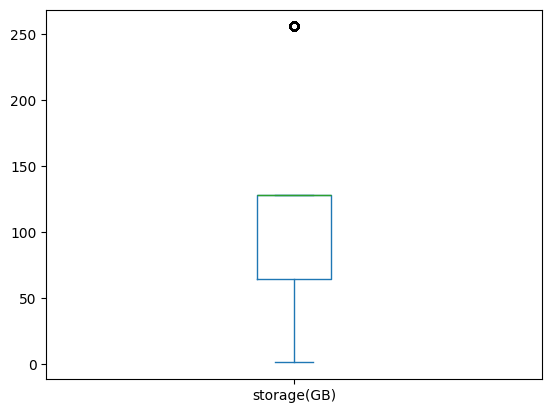

In [27]:
df['storage(GB)'].plot(kind='box')
plt.show()

In [28]:
df.head()

,phone_name,brand,os,battery(MH),ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Huawei,Android 5.1,2500,2,16.0,120.0
1,K20 plus,LG,Android 7.0,2700,2,16.0,100.0
2,P8 Lite (2017),Huawei,Android 7.0,3000,4,16.0,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,4100,4,32.0,150.0
4,P10,Huawei,Android 7.0,3200,4,32.0,420.0


In [29]:
df.head()

,phone_name,brand,os,battery(MH),ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Huawei,Android 5.1,2500,2,16.0,120.0
1,K20 plus,LG,Android 7.0,2700,2,16.0,100.0
2,P8 Lite (2017),Huawei,Android 7.0,3000,4,16.0,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,4100,4,32.0,150.0
4,P10,Huawei,Android 7.0,3200,4,32.0,420.0


In [30]:
X = df.drop("price(USD $)", axis=1)
y = df["price(USD $)"]


In [31]:
categorical_features = ["phone_name", "brand", "os"]
numeric_features = ["battery(MH)", "ram(GB)", "storage(GB)"]

# OneHotEncoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)


In [32]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: 0.18069917166959626
Mean Absolute Error: 180.69570496680765


In [35]:
# Take user input
phone_name = input("Enter phone name: ")
brand = input("Enter brand: ")
os = input("Enter operating system: ")
battery = int(input("Enter battery capacity (mAh): "))
ram = int(input("Enter RAM (GB): "))
storage = int(input("Enter storage (GB): "))

# Create DataFrame for prediction
user_phone = pd.DataFrame({
    "phone_name": [phone_name],
    "brand": [brand],
    "os": [os],
    "battery(MH)": [battery],
    "ram(GB)": [ram],
    "storage(GB)": [storage]
})

# Predict price
predicted_price = model.predict(user_phone)
print(f"\n📱 Predicted Price: ${predicted_price[0]:.2f} USD")


Enter phone name:  Redme
Enter brand:  redmi note13 pro
Enter operating system:  Android
Enter battery capacity (mAh):  5100
Enter RAM (GB):  12
Enter storage (GB):  256



📱 Predicted Price: $704.17 USD


In [36]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd

# Function to predict price
def predict_price():
    try:
        phone_name = entry_phone.get()
        brand = entry_brand.get()
        os = entry_os.get()
        battery = int(entry_battery.get())
        ram = int(entry_ram.get())
        storage = int(entry_storage.get())

        # Create dataframe for prediction
        user_phone = pd.DataFrame({
            "phone_name": [phone_name],
            "brand": [brand],
            "os": [os],
            "battery(MH)": [battery],
            "ram(GB)": [ram],
            "storage(GB)": [storage]
        })

        # Predict
        predicted_price = model.predict(user_phone)[0]
        messagebox.showinfo("Prediction", f"📱 Predicted Price: ${predicted_price:.2f} USD")

    except Exception as e:
        messagebox.showerror("Error", f"Invalid Input: {e}")

# Tkinter window
root = tk.Tk()
root.title("Phone Price Predictor")
root.geometry("400x350")

# Labels and Entries
tk.Label(root, text="Phone Name").pack()
entry_phone = tk.Entry(root, width=30)
entry_phone.pack()

tk.Label(root, text="Brand").pack()
entry_brand = tk.Entry(root, width=30)
entry_brand.pack()

tk.Label(root, text="Operating System").pack()
entry_os = tk.Entry(root, width=30)
entry_os.pack()

tk.Label(root, text="Battery (mAh)").pack()
entry_battery = tk.Entry(root, width=30)
entry_battery.pack()

tk.Label(root, text="RAM (GB)").pack()
entry_ram = tk.Entry(root, width=30)
entry_ram.pack()

tk.Label(root, text="Storage (GB)").pack()
entry_storage = tk.Entry(root, width=30)
entry_storage.pack()

# Predict Button
tk.Button(root, text="Predict Price", command=predict_price, bg="green", fg="white").pack(pady=15)

root.mainloop()
